## Color Identification and distribution using KMeans and OpenCV

####  STEPS FOLLOWED :-
<font> - Load required libraries and packages </font><br>
<font> - Load in the image we will work on </font><br>
<font> - Convert image respresentations </font><br>
<font> - Color identification </font><br>
<font> - Checking out our creation </font><br>

#### STEP 1-

In [29]:
#Clustering algorithm to separate out clusters in our case colours
from sklearn.cluster import KMeans 

#plotting graphs and images
import matplotlib.pyplot as plt 


#process images as numpy arrays
import numpy as np 

#image processing library OpenCV
import cv2 

#It is an unordered collection where elements are stored as dictionary keys and 
#their counts are stored as dictionary values.
from collections import Counter 

#Convert image respresentations
from skimage.color import rgb2lab, deltaE_cie76

#loading images
import os

#sets the backend of matplotlib to the 'inline' backend: With this backend, 
#the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

#### STEP 2-

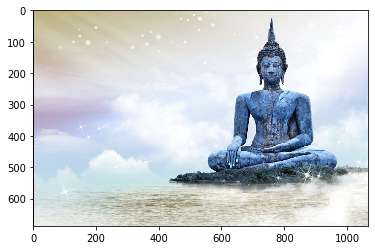

In [30]:
#reading in the image into a numpy array
image = cv2.imread('budh2.png')

#plot the image
plt.imshow(image)

In [31]:
print("Image is of type {}".format(type(image)))
print("Shape of numpy image array {}".format(image.shape))

Image is of type <class 'numpy.ndarray'>
Shape of numpy image array (687, 1067, 3)


In [32]:
# 689, 1067 => pixels in image
# 3 => channels in image

In [33]:
# Since OpenCV by default reads an image as BGR channels instead of RGB the image colors are a bit off. 
# So we will convert the channels to RGB using cv2.cvtColor function

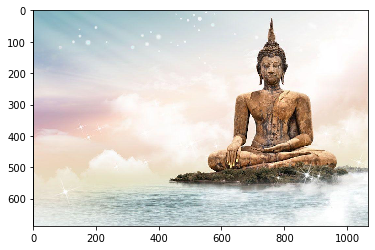

In [34]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Superb that's original image

#### STEP 3-

In [35]:
# we will define a function which converts a color (RGB) to its hex code

def colorToHex(color):
    #{:02x} print atleast 2 digits of hex code for a channel
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [36]:
# function to read an image into RGB space

def read_image(image_path):
    #reading in the image into a numpy array
    image = cv2.imread(image_path)
    
    #convert the channels to RGB using cv2.cvtColor function
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [49]:
# fetch colors from image and display as a pie chart distribution
# arguments => image, count of top colors, display_chart

def fetch_colors(image, color_count, display_chart):
    #KMeans expects the input to be of two dimensions, 
    #so we use Numpy’s reshape function to reshape the image data.
    
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    #color clusters
    clf = KMeans(n_clusters = color_count)
    
    #fit the model and extract the prediction into the variable predictions
    predictions = clf.fit_predict(modified_image)
    
    #create a collection of count of colors
    counts = Counter(predictions)
    
    center_colors = clf.cluster_centers_
    
    #fetch ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [colorToHex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    #if display_chart is true, plot pie chart
    if (display_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return counts, hex_colors,center_colors, predictions

#### STEP 4-

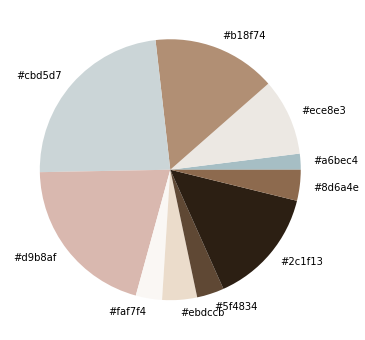

In [50]:
loaded_image = read_image('budh2.png')
color_count = 10
display_chart  = True

colors_fetched_counts, colors_fetched, center_colors, predictions = fetch_colors(loaded_image, color_count, display_chart)

## SUPERB!!!! Our own color extractor is ready and that too with stats 

In [51]:
#print out fetched colors
colors_fetched

['#a6bec4',
 '#ece8e3',
 '#b18f74',
 '#cbd5d7',
 '#d9b8af',
 '#faf7f4',
 '#ebdccb',
 '#5f4834',
 '#2c1f13',
 '#8d6a4e']

In [52]:
colors_fetched_counts

Counter({1: 14508,
         3: 69544,
         5: 112445,
         2: 172218,
         7: 149838,
         4: 23863,
         8: 31640,
         9: 24674,
         0: 106217,
         6: 28082})

In [53]:
center_colors

array([[235.88426079, 220.42444932, 203.02733856],
       [ 44.04164666,  31.06977702,  19.99073756],
       [236.98148266, 232.86539656, 227.95822712],
       [166.77670392, 190.60079677, 196.49971955],
       [177.75390297, 143.92714454, 116.35835991],
       [203.46424442, 213.28727208, 215.35840968],
       [ 95.36878954,  72.74962684,  52.89348923],
       [250.19224095, 247.08601289, 244.5368865 ],
       [141.94429146, 106.31791853,  78.54375969],
       [217.63194557, 184.21302446, 175.85614774]])

In [57]:
predictions

array([1, 1, 3, ..., 5, 5, 5], dtype=int32)

<hr>